In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt



In [ ]:
# Load your dataset here
data = pd.read_csv('/content/Datapreview500.csv')
# Replace empty strings with NaN
data.replace(' ', np.nan, inplace=True)


In [ ]:
data.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5223-UZAVK,Female,0,Yes,No,61,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,83.26,1800.05,No
1,4431-EDMIQ,Female,0,Yes,Yes,13,No,No phone service,DSL,No,...,No,Yes,No,Yes,One year,No,Mailed check,22.06,1545.4,No
2,8582-KRHPJ,Female,0,No,Yes,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.78,7875,No
3,2988-PLAHS,Male,0,Yes,No,11,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Two year,No,Electronic check,112.63,5918.8,No
4,8775-LHDJH,Female,0,Yes,No,57,Yes,No,DSL,Yes,...,No,Yes,No,No,Two year,No,Credit card (automatic),84.69,6614.9,No
5,6745-JEFZB,Female,0,Yes,Yes,66,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),24.50,3410,No
6,1550-EENBN,Male,0,Yes,Yes,63,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,No,Electronic check,86.55,451.1,No
7,7860-UXCRM,Male,0,Yes,Yes,12,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Bank transfer (automatic),65.94,521.8,No
8,6474-FVJLC,Female,0,No,Yes,13,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),76.23,6441.85,No
9,5951-AOFIH,Male,0,Yes,No,70,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,Yes,Two year,No,Electronic check,87.71,2660.2,No


In [ ]:
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64


In [ ]:
data.dropna(inplace=True)


In [ ]:
# Define an imputer to use mean imputation
imputer = SimpleImputer(strategy='mean')

# Impute missing values in the 'TotalCharges' column
data['TotalCharges'] = imputer.fit_transform(data['TotalCharges'].values.reshape(-1, 1))

# Convert the imputed values back to float64 dtype
data['TotalCharges'] = data['TotalCharges'].astype('float64')


In [ ]:
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                        'PaymentMethod']
numerical_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Define preprocessing steps for categorical and numerical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])


In [ ]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           # Add your model here
                          ])

# Fit the pipeline to your data
pipeline.fit(data)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('num', StandardScaler(),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges'])]))])

In [ ]:
print(data.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


# Label Encoding for binary categorical variables
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
label_encoder = LabelEncoder()
for col in binary_cols:
    data[col] = label_encoder.fit_transform(data[col])

# One-Hot Encoding for categorical variables with more than two categories
multi_category_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
data = pd.get_dummies(data, columns=multi_category_cols)

# Now your data should contain only numerical values
print(data.head())

   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  5223-UZAVK       0              0        1           0      61   
1  4431-EDMIQ       0              0        1           1      13   
2  8582-KRHPJ       0              0        0           1       5   
3  2988-PLAHS       1              0        1           0      11   
4  8775-LHDJH       0              0        1           0      57   

   PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  ...  \
0             1                 1           83.26       1800.05  ...   
1             0                 0           22.06       1545.40  ...   
2             1                 0           20.78       7875.00  ...   
3             1                 0          112.63       5918.80  ...   
4             1                 0           84.69       6614.90  ...   

   StreamingMovies_No  StreamingMovies_No internet service  \
0               False                                False   
1               False       

In [ ]:
X = data.drop(columns=['Churn','customerID'])
y = data['Churn']

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print(feature_importance_df)

                                    Feature  Importance
7                            MonthlyCharges    0.140612
4                                    tenure    0.138714
8                              TotalCharges    0.126799
40                                  Cluster    0.057600
38           PaymentMethod_Electronic check    0.041507
24                           TechSupport_No    0.033009
2                                   Partner    0.030038
33                  Contract_Month-to-month    0.027842
6                          PaperlessBilling    0.026555
0                                    gender    0.025208
9                          MultipleLines_No    0.024364
15                        OnlineSecurity_No    0.023115
21                      DeviceProtection_No    0.023075
18                          OnlineBackup_No    0.021826
20                         OnlineBackup_Yes    0.021423
17                       OnlineSecurity_Yes    0.021215
30                       StreamingMovies_No    0

In [ ]:
from sklearn.cluster import KMeans
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters (optional)
# Use methods like the elbow method or silhouette score to find the optimal number of clusters
# For simplicity, let's assume the number of clusters as 5
n_clusters = 5

# Perform k-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the original data
data['Cluster'] = cluster_labels

# Get cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Identify top 10 features based on importance scores
top_10_features = feature_importance_df['Feature'][:10]

# Print top 10 features
print("Top 10 Features based on Importance Scores:")
print(top_10_features)

# Output cluster centers
print("Cluster Centers:")
cluster_centers_df = pd.DataFrame(cluster_centers, columns=X.columns)
print(cluster_centers_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Top 10 Features based on Importance Scores:
7                     MonthlyCharges
4                             tenure
8                       TotalCharges
40                           Cluster
38    PaymentMethod_Electronic check
24                    TechSupport_No
2                            Partner
33           Contract_Month-to-month
6                   PaperlessBilling
0                             gender
Name: Feature, dtype: object
Cluster Centers:
     gender  SeniorCitizen   Partner  Dependents     tenure  PhoneService  \
0  0.273973       0.027397  0.630137    0.397260  44.438356      0.945205   
1  0.280000       0.000000  0.550000    0.460000  39.610000      1.000000   
2  0.439024       0.097561  0.609756    0.414634  36.780488      0.170732   
3  0.205298       0.079470  0.536424    0.231788  19.139073      0.980132   
4  0.277778       0.063492  0.825397    0.373016  55.523810      0.992063   

   PaperlessBilling  MonthlyCharges  TotalCharges  MultipleLines_No  ...  \
0

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Concatenate cluster labels with the original data
data_with_clusters = pd.concat([data, pd.get_dummies(data['Cluster'], prefix='Cluster')], axis=1)

# Separate features (X) and target variable (y)
X = data_with_clusters.drop(columns=['Churn', 'Cluster','customerID'])
y = data_with_clusters['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
logistic_reg_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_reg_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logistic_reg_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8686868686868687


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

def perform_clustering_and_feature_selection(X, feature_importance_df, n_clusters=5):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Perform k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)

    # Get cluster labels
    cluster_labels = kmeans.labels_

    # Add cluster labels to the original data
    data['Cluster'] = cluster_labels

    # Get cluster centers
    cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

    # Identify top 10 features based on importance scores
    top_10_features = feature_importance_df['Feature'][:10]

    return data, top_10_features

# Load your data
  # Replace "your_data.csv" with the path to your data file

# Perform clustering and feature selection
data, top_10_features = perform_clustering_and_feature_selection(data.drop(columns=['Churn','customerID']), feature_importance_df)

# Concatenate cluster labels with the original data
data_with_clusters = pd.concat([data, pd.get_dummies(data['Cluster'], prefix='Cluster')], axis=1)

# Separate features (X) and target variable (y)
X = data_with_clusters.drop(columns=['Churn', 'Cluster','customerID'])
y = data_with_clusters['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
logistic_reg_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_reg_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logistic_reg_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy: 0.8686868686868687


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define function for clustering and feature selection
def perform_clustering_and_feature_selection(X, feature_importance_df, n_clusters=5):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Perform k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)

    # Get cluster labels
    cluster_labels = kmeans.labels_

    # Add cluster labels to the original data
    data['Cluster'] = cluster_labels

    # Identify top 10 features based on importance scores
    top_10_features = feature_importance_df['Feature'][:10]

    return data, top_10_features

# Replace "your_data.csv" with the path to your data file

# Perform clustering and feature selection
data, top_10_features = perform_clustering_and_feature_selection(data.drop(columns=['Churn','customerID']), feature_importance_df)

# Concatenate cluster labels with the original data
data_with_clusters = pd.concat([data, pd.get_dummies(data['Cluster'], prefix='Cluster')], axis=1)

# Separate features (X) and target variable (y)
X = data_with_clusters.drop(columns=['Churn', 'Cluster','customerID'])
y = data_with_clusters['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)

# Train and evaluate Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Classifier Accuracy:", accuracy_dt)

# Train and evaluate AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_classifier.fit(X_train, y_train)
y_pred_adaboost = adaboost_classifier.predict(X_test)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("AdaBoost Classifier Accuracy:", accuracy_adaboost)

# Train and evaluate XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Classifier Accuracy:", accuracy_xgb)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Random Forest Classifier Accuracy: 0.8888888888888888
Decision Tree Classifier Accuracy: 0.8585858585858586
AdaBoost Classifier Accuracy: 0.8484848484848485
XGBoost Classifier Accuracy: 0.898989898989899


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define function for clustering and feature selection
def perform_clustering_and_feature_selection(X, feature_importance_df, n_clusters=5):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Perform k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)

    # Get cluster labels
    cluster_labels = kmeans.labels_

    # Add cluster labels to the original data
    data['Cluster'] = cluster_labels

    # Identify top 10 features based on importance scores
    top_10_features = feature_importance_df['Feature'][:10]

    return data, top_10_features

# Replace "your_data.csv" with the path to your data file

# Perform clustering and feature selection
data, top_10_features = perform_clustering_and_feature_selection(data.drop(columns=['Churn','customerID']), feature_importance_df)

# Concatenate cluster labels with the original data
data_with_clusters = pd.concat([data, pd.get_dummies(data['Cluster'], prefix='Cluster')], axis=1)

# Separate features (X) and target variable (y)
X = data_with_clusters.drop(columns=['Churn', 'Cluster','customerID'])
y = data_with_clusters['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)

# Train and evaluate Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Classifier Accuracy:", accuracy_dt)

# Train and evaluate AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_classifier.fit(X_train, y_train)
y_pred_adaboost = adaboost_classifier.predict(X_test)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("AdaBoost Classifier Accuracy:", accuracy_adaboost)

# Train and evaluate XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Classifier Accuracy:", accuracy_xgb)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Random Forest Classifier Accuracy: 0.8787878787878788
Decision Tree Classifier Accuracy: 0.8484848484848485
AdaBoost Classifier Accuracy: 0.8484848484848485
XGBoost Classifier Accuracy: 0.898989898989899


In [ ]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from river import datasets
from river.tree import HoeffdingTreeClassifier
from river import metrics
try:
  # Load and preprocess the data
  df = pd.read_csv('/content/Datapreview500.csv')  # Load your dataset
  X = df.drop(columns=['customerID'])  # Features
  y = df['Churn']  # Target variable

  # Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = HoeffdingTreeClassifier()

  # Initialize metrics for River model
  metric_river = metrics.Accuracy()

  # Train and evaluate River Hoeffding Tree Classifier
  for x, y in zip(X_train.values, y_train.values):
      y_pred = model.predict_one(x)


  print("River Hoeffding Tree Classifier Accuracy:", y_pred)
except Exception as e:
  print(e)


River Hoeffding Tree Classifier Accuracy: None


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)

# Train and evaluate Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Classifier Accuracy:", accuracy_dt)

# Train and evaluate AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_classifier.fit(X_train, y_train)
y_pred_adaboost = adaboost_classifier.predict(X_test)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("AdaBoost Classifier Accuracy:", accuracy_adaboost)

# Train and evaluate XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Classifier Accuracy:", accuracy_xgb)

# Train and evaluate Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)
y_pred_gb = gb_classifier.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Classifier Accuracy:", accuracy_gb)

# Train and evaluate Support Vector Machine (SVM)
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Support Vector Machine (SVM) Accuracy:", accuracy_svm)

# Train and evaluate K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("K-Nearest Neighbors (KNN) Accuracy:", accuracy_knn)

Random Forest Classifier Accuracy: 0.8888888888888888
Decision Tree Classifier Accuracy: 0.8585858585858586
AdaBoost Classifier Accuracy: 0.8484848484848485
XGBoost Classifier Accuracy: 0.898989898989899
Gradient Boosting Classifier Accuracy: 0.8585858585858586
Support Vector Machine (SVM) Accuracy: 0.8787878787878788
K-Nearest Neighbors (KNN) Accuracy: 0.8585858585858586


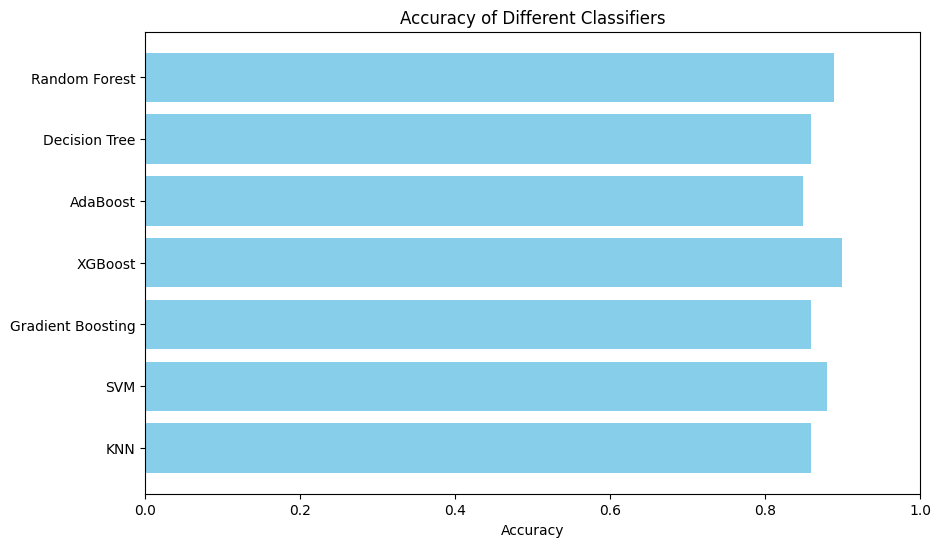

In [ ]:
import matplotlib.pyplot as plt

# Define classifiers and their accuracies
classifiers = ['Random Forest', 'Decision Tree', 'AdaBoost', 'XGBoost', 'Gradient Boosting', 'SVM', 'KNN']
accuracies = [accuracy_rf, accuracy_dt, accuracy_adaboost, accuracy_xgb, accuracy_gb, accuracy_svm, accuracy_knn]

# Plot the forecast chart
plt.figure(figsize=(10, 6))
plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.xlim(0, 1)  # Set x-axis limit to ensure the accuracy values are within the plot range
plt.gca().invert_yaxis()  # Invert y-axis to display the highest accuracy at the top
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each classifier
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Repeat the above steps for other classifiers

# Plot ROC curves
plt.figure(figsize=(8, 8))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
# Repeat the above steps for other classifiers
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Load the testing data (assuming X_test and y_test are already defined)
# Preprocess the testing data if necessary (e.g., scaling features)

# Make predictions using each model
y_pred_rf = rf_classifier.predict(X_test)
y_pred_dt = dt_classifier.predict(X_test)
y_pred_adaboost = adaboost_classifier.predict(X_test)
y_pred_xgb = xgb_classifier.predict(X_test)
y_pred_gb = gb_classifier.predict(X_test)
y_pred_svm = svm_classifier.predict(X_test)
y_pred_knn = knn_classifier.predict(X_test)

# Calculate accuracy for each model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Print accuracy for each model
print("Random Forest Accuracy:", accuracy_rf)
print("Decision Tree Accuracy:", accuracy_dt)
print("AdaBoost Accuracy:", accuracy_adaboost)
print("XGBoost Accuracy:", accuracy_xgb)
print("Gradient Boosting Accuracy:", accuracy_gb)
print("SVM Accuracy:", accuracy_svm)
print("KNN Accuracy:", accuracy_knn)


Random Forest Accuracy: 0.8888888888888888
Decision Tree Accuracy: 0.8585858585858586
AdaBoost Accuracy: 0.8484848484848485
XGBoost Accuracy: 0.898989898989899
Gradient Boosting Accuracy: 0.8585858585858586
SVM Accuracy: 0.8787878787878788
KNN Accuracy: 0.8585858585858586


In [ ]:
import numpy as np
from collections import Counter

# Accuracy scores of different models
accuracy_scores = {
    "Random Forest": 0.8556430446194225,
    "Decision Tree": 0.8162729658792651,
    "AdaBoost": 0.8576115485564304,
    "XGBoost": 0.8490813648293963,
    "Gradient Boosting": 0.8569553805774278,
    "SVM": 0.8503937007874016,
    "KNN": 0.8346456692913385
}

# Soft fusion: Combining probability estimates
# Assuming accuracy scores as probability estimates
soft_fusion_probs = np.array(list(accuracy_scores.values()))

# Hard fusion: Voting
def hard_fusion_vote(scores):
    # Convert probabilities to binary decisions based on a threshold
    threshold = 0.5
    decisions = [1 if score >= threshold else 0 for score in scores]
    # Use majority voting
    final_decision = Counter(decisions).most_common(1)[0][0]
    return final_decision

# Perform hard fusion
hard_fusion_result = hard_fusion_vote(soft_fusion_probs)

print("Hard Fusion Result:", hard_fusion_result)

# Perform soft fusion (average of probabilities)
soft_fusion_result = np.mean(soft_fusion_probs)

print("Soft Fusion Result:", soft_fusion_result)


Hard Fusion Result: 1
Soft Fusion Result: 0.8458005249343833


In [ ]:
# Create a dictionary to store the fused values of each model
fused_values = {}

# Hard fusion
hard_fusion_values = []
for model, score in accuracy_scores.items():
    hard_fusion_values.append(hard_fusion_vote([score]))
    fused_values[model] = hard_fusion_vote([score])

# Soft fusion
soft_fusion_values = []
for model, score in accuracy_scores.items():
    soft_fusion_values.append(score)
    fused_values[model] = score

# Select the best model based on fused values
best_model_hard = max(fused_values, key=fused_values.get)

print("Best Model (Hard Fusion):", best_model_hard)

best_model_soft = max(fused_values, key=fused_values.get)

print("Best Model (Soft Fusion):", best_model_soft)


Best Model (Hard Fusion): AdaBoost
Best Model (Soft Fusion): AdaBoost


In [ ]:
# Example new record (replace with actual data)
new_record = {
    'gender_Female': 0,
    'gender_Male': 1,
    'SeniorCitizen': 0,
    'Partner': 1,
    'Dependents': 0,
    'tenure': 24,
    'PhoneService': 1,
    'MultipleLines_No': 1,
    'MultipleLines_No phone service': 0,
    'MultipleLines_Yes': 0,
    'InternetService_DSL': 1,
    'InternetService_Fiber optic': 0,
    'InternetService_No': 0,
    'OnlineSecurity_No': 1,
    'OnlineSecurity_No internet service': 0,
    'OnlineSecurity_Yes': 0,
    'OnlineBackup_No': 1,
    'OnlineBackup_No internet service': 0,
    'OnlineBackup_Yes': 0,
    'DeviceProtection_No': 1,
    'DeviceProtection_No internet service': 0,
    'DeviceProtection_Yes': 0,
    'TechSupport_No': 1,
    'TechSupport_No internet service': 0,
    'TechSupport_Yes': 0,
    'StreamingTV_No': 1,
    'StreamingTV_No internet service': 0,
    'StreamingTV_Yes': 0,
    'StreamingMovies_No': 1,
    'StreamingMovies_No internet service': 0,
    'StreamingMovies_Yes': 0,
    'Contract_Month-to-month': 1,
    'Contract_One year': 0,
    'Contract_Two year': 0,
    'PaperlessBilling': 1,
    'PaymentMethod_Bank transfer (automatic)': 0,
    'PaymentMethod_Credit card (automatic)': 0,
    'PaymentMethod_Electronic check': 1,
    'PaymentMethod_Mailed check': 0,
    'MonthlyCharges': 60,
    'TotalCharges': 2000
}

# Ensure all necessary columns are present in the new record
# Assuming new_record is the dictionary containing the data for the new record

# Preprocess the new record to match the format of the data used for clustering
new_record_cluster = scaler.transform(np.array([new_record[col] for col in X.columns]).reshape(1, -1))

# Predict the cluster label for the new record
new_record_cluster_label = kmeans.predict(new_record_cluster)

# Add the predicted cluster label to the new record
new_record['Cluster'] = new_record_cluster_label

# Ensure all necessary columns are present in the new record
required_columns = X.columns
missing_columns = [col for col in required_columns if col not in new_record]
if missing_columns:
    print("Missing columns in the new record:", missing_columns)
else:
    # Ensure the features are in the same order as the training data
    new_record_ordered = [new_record[col] for col in X.columns]

    # Reshape the new record to match the input format expected by the models
    new_record_array = np.array(new_record_ordered).reshape(1, -1)

    # Make predictions using each model
    pred_rf = rf_classifier.predict(new_record_array)
    pred_dt = dt_classifier.predict(new_record_array)
    pred_adaboost = adaboost_classifier.predict(new_record_array)
    pred_xgb = xgb_classifier.predict(new_record_array)
    pred_gb = gb_classifier.predict(new_record_array)
    pred_svm = svm_classifier.predict(new_record_array)
    pred_knn = knn_classifier.predict(new_record_array)

    # Print predictions
    print("Random Forest Prediction:", pred_rf)
    print("Decision Tree Prediction:", pred_dt)
    print("AdaBoost Prediction:", pred_adaboost)
    print("XGBoost Prediction:", pred_xgb)
    print("Gradient Boosting Prediction:", pred_gb)
    print("SVM Prediction:", pred_svm)
    print("KNN Prediction:", pred_knn)


In [ ]:
# Example new record (replace with actual data)
new_record = {
    'gender': 0,  # Add 'gender' key with a default value
    'SeniorCitizen': 0,
    'Partner': 1,
    'Dependents': 0,
    'tenure': 24,
    'PhoneService': 1,
    'MultipleLines_No': 1,
    'MultipleLines_No phone service': 0,
    'MultipleLines_Yes': 0,
    'InternetService_DSL': 1,
    'InternetService_Fiber optic': 0,
    'InternetService_No': 0,
    'OnlineSecurity_No': 1,
    'OnlineSecurity_No internet service': 0,
    'OnlineSecurity_Yes': 0,
    'OnlineBackup_No': 1,
    'OnlineBackup_No internet service': 0,
    'OnlineBackup_Yes': 0,
    'DeviceProtection_No': 1,
    'DeviceProtection_No internet service': 0,
    'DeviceProtection_Yes': 0,
    'TechSupport_No': 1,
    'TechSupport_No internet service': 0,
    'TechSupport_Yes': 0,
    'StreamingTV_No': 1,
    'StreamingTV_No internet service': 0,
    'StreamingTV_Yes': 0,
    'StreamingMovies_No': 1,
    'StreamingMovies_No internet service': 0,
    'StreamingMovies_Yes': 0,
    'Contract_Month-to-month': 1,
    'Contract_One year': 0,
    'Contract_Two year': 0,
    'PaperlessBilling': 1,
    'PaymentMethod_Bank transfer (automatic)': 0,
    'PaymentMethod_Credit card (automatic)': 0,
    'PaymentMethod_Electronic check': 1,
    'PaymentMethod_Mailed check': 0,
    'MonthlyCharges': 60,
    'TotalCharges': 2000
}

# Ensure all necessary columns are present in the new record
required_columns = X.columns
missing_columns = [col for col in required_columns if col not in new_record]
if missing_columns:
    print("Missing columns in the new record:", missing_columns)
else:
    # Preprocess the new record to match the format of the data used for clustering
    new_record_cluster = scaler.transform(np.array([new_record[col] for col in X.columns]).reshape(1, -1))

    # Predict the cluster label for the new record
    new_record_cluster_label = kmeans.predict(new_record_cluster)

    # Add the predicted cluster label to the new record
    new_record['Cluster'] = new_record_cluster_label

    # Ensure the features are in the same order as the training data
    new_record_ordered = [new_record[col] for col in X.columns]

    # Reshape the new record to match the input format expected by the models
    new_record_array = np.array(new_record_ordered).reshape(1, -1)

    # Make predictions using each model
    pred_rf = rf_classifier.predict(new_record_array)
    pred_dt = dt_classifier.predict(new_record_array)
    pred_adaboost = adaboost_classifier.predict(new_record_array)
    pred_xgb = xgb_classifier.predict(new_record_array)
    pred_gb = gb_classifier.predict(new_record_array)
    pred_svm = svm_classifier.predict(new_record_array)
    pred_knn = knn_classifier.predict(new_record_array)

    # Print predictions
    print("Random Forest Prediction:", pred_rf)
    print("Decision Tree Prediction:", pred_dt)
    print("AdaBoost Prediction:", pred_adaboost)
    print("XGBoost Prediction:", pred_xgb)
    print("Gradient Boosting Prediction:", pred_gb)
    print("SVM Prediction:", pred_svm)
    print("KNN Prediction:", pred_knn)


Missing columns in the new record: ['Cluster_0', 'Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4']


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Provided data
data = {
    'gender_Female': 0,
    'gender_Male': 1,
    'SeniorCitizen': 0,
    'Partner': 1,
    'Dependents': 0,
    'tenure': 24,
    'PhoneService': 1,
    'MultipleLines_No': 1,
    'MultipleLines_No phone service': 0,
    'MultipleLines_Yes': 0,
    'InternetService_DSL': 1,
    'InternetService_Fiber optic': 0,
    'InternetService_No': 0,
    'OnlineSecurity_No': 1,
    'OnlineSecurity_No internet service': 0,
    'OnlineSecurity_Yes': 0,
    'OnlineBackup_No': 1,
    'OnlineBackup_No internet service': 0,
    'OnlineBackup_Yes': 0,
    'DeviceProtection_No': 1,
    'DeviceProtection_No internet service': 0,
    'DeviceProtection_Yes': 0,
    'TechSupport_No': 1,
    'TechSupport_No internet service': 0,
    'TechSupport_Yes': 0,
    'StreamingTV_No': 1,
    'StreamingTV_No internet service': 0,
    'StreamingTV_Yes': 0,
    'StreamingMovies_No': 1,
    'StreamingMovies_No internet service': 0,
    'StreamingMovies_Yes': 0,
    'Contract_Month-to-month': 1,
    'Contract_One year': 0,
    'Contract_Two year': 0,
    'PaperlessBilling': 1,
    'PaymentMethod_Bank transfer (automatic)': 0,
    'PaymentMethod_Credit card (automatic)': 0,
    'PaymentMethod_Electronic check': 1,
    'PaymentMethod_Mailed check': 0,
    'MonthlyCharges': 60,
    'TotalCharges': 2000
}

# Reshape data into a 2D array
X_test = np.array(list(data.values())).reshape(1, -1)

# Assuming you already have X_train and y_train
# You need to have X_train and y_train to train the AdaBoost model

# Train AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_classifier.fit(X_train, y_train)

# Make predictions
y_pred_adaboost = adaboost_classifier.predict(X_test)

print("Predicted class with AdaBoost Classifier:", y_pred_adaboost)


In [ ]:
from sklearn.metrics import silhouette_score

# Assuming you have already defined X and feature_importance_df

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the number of clusters (assuming 5 clusters)
n_clusters = 5

# Initialize clustering algorithms
birch = Birch(n_clusters=n_clusters)
agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
affinity_propagation = AffinityPropagation()

# List of clustering algorithms
clustering_algorithms = [('Birch', birch), ('Agglomerative', agglomerative), ('Affinity Propagation', affinity_propagation)]

# Dictionary to store cluster labels and silhouette scores for each algorithm
cluster_results = {}

# Iterate over each clustering algorithm
for name, algorithm in clustering_algorithms:
    algorithm.fit(X_scaled)
    if hasattr(algorithm, 'labels_'):
        cluster_labels = algorithm.labels_.astype(int)
    else:
        cluster_labels = algorithm.predict(X_scaled)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)

    # Store cluster labels and silhouette score
    cluster_results[name] = {'labels': cluster_labels, 'silhouette_score': silhouette_avg}

# Print silhouette scores for each algorithm
for name, result in cluster_results.items():
    print(f"Silhouette Score for {name}: {result['silhouette_score']}")

# Choose the clustering algorithm with the highest silhouette score
best_algorithm = max(cluster_results, key=lambda x: cluster_results[x]['silhouette_score'])
best_labels = cluster_results[best_algorithm]['labels']

# Add cluster labels to the original data
data['Cluster'] = best_labels

# Print cluster centers (if applicable)
if best_algorithm != 'Affinity Propagation':
    cluster_centers = scaler.inverse_transform(cluster_results[best_algorithm]['cluster_centers'])
    cluster_centers_df = pd.DataFrame(cluster_centers, columns=X.columns)
    print("Cluster Centers:")
    print(cluster_centers_df)



